In [2]:

import spotipy
import json
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials

try:
    with open('config.json', 'r') as file:
        config_data = json.load(file)
except FileNotFoundError:
    print('Config file not found.')
except json.JSONDecodeError:
    print('Error decoding JSON in the config file.')

columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
           'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature']

track_data = pd.DataFrame(columns=columns)

# authentication without user
client_credentials_manager = SpotifyClientCredentials(
    client_id=config_data['client_id'], client_secret=config_data['client_secret'])
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

playlist_link = 'https://open.spotify.com/playlist/37i9dQZEVXbNG2KDcFcKOF?si=1333723a6eff4b7f'
playlist_URI = playlist_link.split('/')[-1].split('?')[0]

for track in sp.playlist_tracks(playlist_URI)['items']:
    track_uri = track['track']['uri']

    track_features = pd.DataFrame(
        [sp.audio_features(track_uri)[0]], columns=columns)

    track_data = pd.concat([track_data, track_features], ignore_index=True)

track_data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.802,0.8320,11,-4.107,1,0.0434,0.3110,0,0.0815,0.890,124.997,audio_features,7x9aauaA9cu6tyfpHnqDLo,spotify:track:7x9aauaA9cu6tyfpHnqDLo,https://api.spotify.com/v1/tracks/7x9aauaA9cu6...,https://api.spotify.com/v1/audio-analysis/7x9a...,185427,4
1,0.552,0.7020,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,audio_features,1BxfuPKGuaTgP7aM0Bbdwr,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,https://api.spotify.com/v1/tracks/1BxfuPKGuaTg...,https://api.spotify.com/v1/audio-analysis/1Bxf...,178427,4
2,0.708,0.7370,1,-4.045,1,0.0436,0.0739,0.00162,0.0955,0.607,91.986,audio_features,7ABLbnD53cQK00mhcaOUVG,spotify:track:7ABLbnD53cQK00mhcaOUVG,https://api.spotify.com/v1/tracks/7ABLbnD53cQK...,https://api.spotify.com/v1/audio-analysis/7ABL...,197920,4
3,0.444,0.0911,0,-17.665,1,0.0307,0.9590,0.000001,0.0980,0.142,78.403,audio_features,6wf7Yu7cxBSPrRlWeSeK0Q,spotify:track:6wf7Yu7cxBSPrRlWeSeK0Q,https://api.spotify.com/v1/tracks/6wf7Yu7cxBSP...,https://api.spotify.com/v1/audio-analysis/6wf7...,222370,4
4,0.868,0.5380,5,-8.603,1,0.1740,0.2690,0.000003,0.0901,0.732,99.968,audio_features,2IGMVunIBsBLtEQyoI1Mu7,spotify:track:2IGMVunIBsBLtEQyoI1Mu7,https://api.spotify.com/v1/tracks/2IGMVunIBsBL...,https://api.spotify.com/v1/audio-analysis/2IGM...,231750,4


In [6]:
track_data.info()

track_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      50 non-null     float64
 1   energy            50 non-null     float64
 2   key               50 non-null     object 
 3   loudness          50 non-null     float64
 4   mode              50 non-null     object 
 5   speechiness       50 non-null     float64
 6   acousticness      50 non-null     float64
 7   instrumentalness  50 non-null     object 
 8   liveness          50 non-null     float64
 9   valence           50 non-null     float64
 10  tempo             50 non-null     float64
 11  type              50 non-null     object 
 12  id                50 non-null     object 
 13  uri               50 non-null     object 
 14  track_href        50 non-null     object 
 15  analysis_url      50 non-null     object 
 16  duration_ms       50 non-null     object 
 17 

,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.67520,0.660102,-6.342480,0.084480,0.261720,0.180334,0.539180,122.561580
std,0.12578,0.165715,2.519681,0.080989,0.240382,0.127736,0.214201,30.305477
min,0.44400,0.091100,-17.665000,0.025600,0.001960,0.032200,0.142000,67.528000
25%,0.56950,0.585250,-7.382000,0.038950,0.074825,0.093625,0.371500,99.263750
50%,0.66000,0.679500,-5.694000,0.053550,0.181500,0.127500,0.534000,120.546500
75%,0.78125,0.758750,-4.933750,0.072800,0.426000,0.261500,0.712500,143.257250
max,0.92700,0.965000,-2.777000,0.351000,0.959000,0.671000,0.964000,203.759000


## Data Cleaning


In [10]:
track_data.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

In [9]:
track_data[track_data.duplicated(keep=False)]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature


## Data Visualization

### Univariate Analysis


/var/folders/vy/c6j5yw3x6td0lcrhv8v891900000gn/T/ipykernel_88356/1883016998.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/vy/c6j5yw3x6td0lcrhv8v891900000gn/T/ipykernel_88356/1883016998.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/vy/c6j5yw3x6td0lcrhv8v891900000gn/T/ipykernel_88356/1883016998.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/vy/c6j5yw3x6td0lcrhv8v891900000gn/T/ipykernel_88356/1883016998.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/vy/c6j5yw3x6td0lcrhv8v891900000gn/T/ipykernel_88356/1883016998.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/vy/c6j5yw3x6td0lcrhv8v891900000gn/T/ipykernel_88356/1883016998.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/vy/c6j5yw3x6td0lcrhv8v891900000gn/T/ipykernel_88356

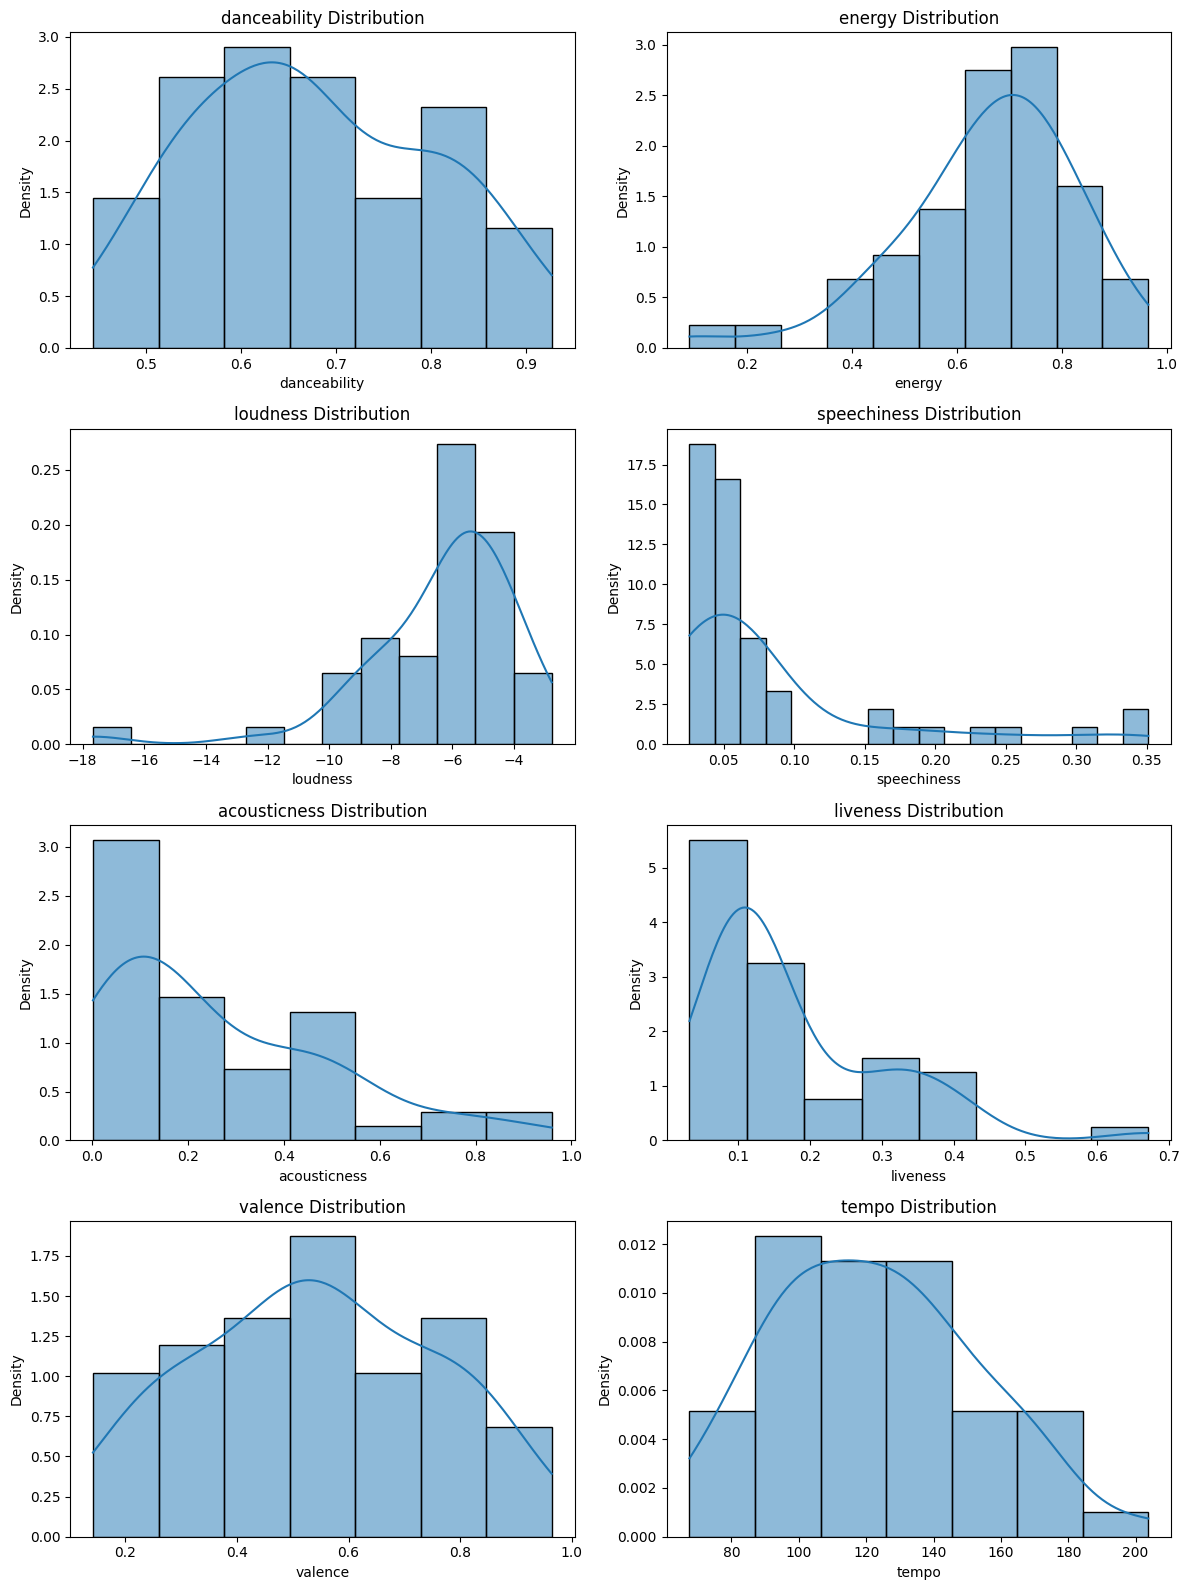

In [16]:
# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# visualize the distribution of each feature
plt.figure(figsize=(12, 16))

for i, j in enumerate(track_data.describe().columns):
    plt.subplot(4, 2, i+1)
    sns.histplot(track_data[j], kde=True, stat='density')
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    plt.tight_layout()

plt.show()

/var/folders/vy/c6j5yw3x6td0lcrhv8v891900000gn/T/ipykernel_88356/1365214450.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/vy/c6j5yw3x6td0lcrhv8v891900000gn/T/ipykernel_88356/1365214450.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/vy/c6j5yw3x6td0lcrhv8v891900000gn/T/ipykernel_88356/1365214450.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/vy/c6j5yw3x6td0lcrhv8v891900000gn/T/ipykernel_88356/1365214450.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/vy/c6j5yw3x6td0lcrhv8v891900000gn/T/ipykernel_88356/1365214450.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/vy/c6j5yw3x6td0lcrhv8v891900000gn/T/ipykernel_88356/1365214450.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/vy/c6j5yw3x6td0lcrhv8v891900000gn/T/ipykernel_88356/13652

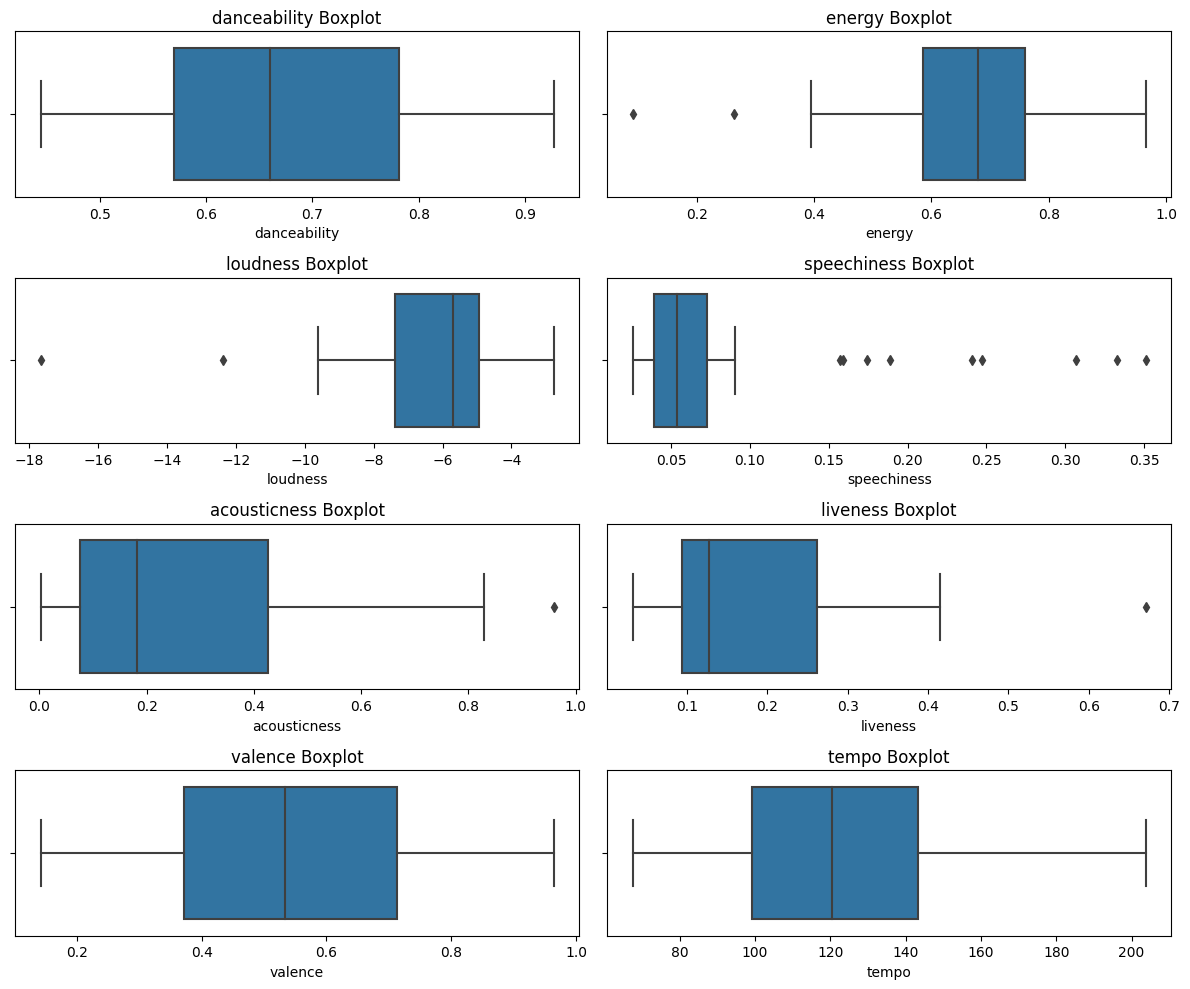

In [17]:
# visualize the boxplot of each variable

plt.figure(figsize=(12, 10))

for i, j in enumerate(track_data.describe().columns):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=track_data[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()

plt.show()

### Bivariate Analysis
